## RNN (Recurrent Neural Network)

### 케라스로 RNN 구현하기

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2, 10))) # 3은 hidden_units값
# model.add(simpleRNN(3, input_length=2, input_dim=10))과 동일
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [4]:
# batch_size 미리 정의하는 경우
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8, 2, 10)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (8, 3)                    42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 출력값으로 3D 텐서 리턴하도록
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8, 2, 10), return_sequences=True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (8, 2, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


### 파이썬으로 RNN 구현하기 (Numpy 사용)

pseudo-code

```python
hidden_state_t = 0 # 초기 은닉 상태를 0(벡터)로 초기화  
for input_t in input_length: # 각 시점마다 입력을 받음
    output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해서 입력과 은닉 상태 연산
    hidden_state_t = output_t # 계산결과는 현재 시점의 은닉 상태
```

In [6]:
# 이해 돕기 위해 (timesteps, input_dim) 크기의 2D 텐서를 입력으로 받았다고 가정
# 실제로는 3D를 입력으로 받음
# timesteps는 시점의 수 => 자연어처리에서는 보통 문장의 길이
# input_dim은 입력의 차원 => 자연어처리에서는 보통 단어 벡터의 차원
# hidden_units는 은닉 상태의 크기 (=메모리 셀의 용량)

import numpy as np

timesteps = 10
input_dim = 4
hidden_units = 8

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))

# 초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_units, ))

print('초기 은닉 상태: ', hidden_state_t)

초기 은닉 상태:  [0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
# 가중치와 편향을 각 크기에 맞게 정의하고 크기 출력

Wx = np.random.random((hidden_units, input_dim))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_units, hidden_units)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_units,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


In [9]:
# RNN층 동작
total_hidden_states = []

# 각 시점 별 입력값
for input_t in inputs:
    # Wx * Wh * Ht-1 + b
    output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh, hidden_state_t) + b)
    
    # 각 시점 t별 메모리 셀의 출력의 크기는(timestep t, output_dim)
    # 각 시점의 은닉 상태의 값을 계속해서 누적
    total_hidden_states.append(list(output_t))
    hidden_state_t = output_t
    
# 출력시 값을 깔끔하게 해주는 용도
total_hidden_states = np.stack(total_hidden_states, axis=0)

# (timesteps, output_dim)
print('모든 시점의 상태:')
print(total_hidden_states)

모든 시점의 상태:
[[0.89933518 0.95275002 0.85107804 0.93873947 0.82386073 0.93612609
  0.85496866 0.89581751]
 [0.99825284 0.99989275 0.99990517 0.99985642 0.99996417 0.99994149
  0.99545758 0.99957458]
 [0.99955972 0.99998845 0.99997055 0.99994621 0.99998309 0.99998459
  0.9984178  0.9997845 ]
 [0.99580976 0.99991897 0.99988002 0.99980694 0.99995696 0.99997991
  0.98654558 0.99979932]
 [0.99899423 0.9999841  0.99995196 0.99991422 0.99997254 0.99998811
  0.99667712 0.99984043]
 [0.99926603 0.99996339 0.99993963 0.99986444 0.99997835 0.99996775
  0.99821201 0.99968858]
 [0.99912314 0.99995631 0.99991797 0.99979843 0.99997014 0.99995976
  0.99805151 0.99961314]
 [0.99742902 0.9999164  0.99984724 0.99966871 0.99994394 0.99995744
  0.99352955 0.99958131]
 [0.99708848 0.99989506 0.99986191 0.99974994 0.99994963 0.99994882
  0.99028298 0.99946948]
 [0.99626306 0.9998527  0.99986064 0.99975461 0.9999621  0.99995986
  0.98928343 0.99966986]]


### 케라스의 SimpleRNN과 LSTM 이해하기

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

In [11]:
# 테스트 하기 위한 임의의 입력
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]

print(np.shape(train_X))

(4, 5)


=> 단어 벡터의 차원은 5이고 문장의 길이가 4인 경우를 가정한 입력
- 4번의 시점(timestep)이 존재하고
- 각 시점마다 5차원의 단어 벡터가 입력으로 사용된다는 뜻

In [12]:
# 위에서 만든 2D 텐서를 3D 텐서로 변경 (RNN은 3D 텐서를 입력 받기 때문)
# 배치 크기 1을 추가하는 걸로 해결
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)

print(train_X.shape)

(1, 4, 5)


- (batch_size, timesteps, input_dim)=(1, 4, 5)
- 샘플이 하나기 때문에 batch_size=1 (batch_size는 RNN이 한 번에 학습하는 데이터의 양)

#### SimpleRNN
- 대표적 인자 2개. 기본값으로 둘 다 False가 지정되어 있음
    - return_sequences
    - return_state

In [13]:
rnn = SimpleRNN(3)
# rnn = SimpleRNN(3, return_sequences=False, return_state=False)와 동일
hidden_state = rnn(train_X)

print('hidden state: {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state: [[-0.7134162  -0.84241366 -0.08909017]], shape: (1, 3)


- (1, 3) 크기의 텐서 출력: 마지막 시점의 은닉 상태임
- return_sequences=False인 경우, SimpleRNN은 마지막 시점의 은닉 상태만 출력

In [14]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_X)

print('hidden states: {}, shape: {}'.format(hidden_states, hidden_states.shape))

hidden states: [[[ 0.87623554 -0.9874189  -0.9059048 ]
  [ 0.8843442  -0.9816589  -0.45952585]
  [ 0.8660315  -0.28414243 -0.82551515]
  [-0.45722505  0.19749255 -0.79400057]]], shape: (1, 4, 3)


- (1, 4, 3) 크기의 텐서 출력: 모든 시점에 대해서 은닉 상태의 값 출력
- return_state=True 인 경우 return_sequences의 T/F 여부와 상관없이 마지막 시점의 은닉 상태 출력

In [16]:
# return_state와 return_sequences가 둘 다 True인 경우
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

print('hidden states: {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state: {}, shape: {}'.format(last_state, last_state.shape))

hidden states: [[[ 0.7411626  -0.6025246  -0.9818072 ]
  [-0.97673255 -0.41425964 -0.98877066]
  [-0.43245587  0.95574385 -0.99225044]
  [-0.8585987   0.5020739  -0.427304  ]]], shape: (1, 4, 3)
last hidden state: [[-0.8585987  0.5020739 -0.427304 ]], shape: (1, 3)


In [18]:
# return_sequences=False인데 return_state=True인 경우
rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_X)

print('hidden states: {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state: {}, shape: {}'.format(last_state, last_state.shape))

hidden states: [[ 0.5578697   0.30826277 -0.96488184]], shape: (1, 3)
last hidden state: [[ 0.5578697   0.30826277 -0.96488184]], shape: (1, 3)


- 두 개 출력 모두 마지막 시점의 은닉 상태 출력

#### LSTM

In [19]:
# return_sequences=False, return_state=True
lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state: {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state: {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state: {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden state: [[-0.1249945  -0.08741842  0.29403904]], shape: (1, 3)
last hidden state: [[-0.1249945  -0.08741842  0.29403904]], shape: (1, 3)
last cell state: [[-0.50208795 -0.18306726  0.5316305 ]], shape: (1, 3)


- return_sequences=False이므로 hidden state는 마지막 시점의 은닉 상태 나타냄
- LSTM은 SimpleRNN과 다르게 return_state=True로 두면 마지막 시점의 은닉 상태 뿐만 아니라 셀 상태까지 반환

In [20]:
# return_sequences=True, return_state=True
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_state, last_cell_state = lstm(train_X)

print('hidden states: {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state: {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state: {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden states: [[[ 0.07288893 -0.00704161  0.4921718 ]
  [ 0.17538598  0.03683595  0.64845127]
  [ 0.20550033  0.12461025  0.48303375]
  [ 0.16927895 -0.05111826  0.72094786]]], shape: (1, 4, 3)
last hidden state: [[ 0.16927895 -0.05111826  0.72094786]], shape: (1, 3)
last cell state: [[ 0.32219917 -0.10674882  1.5304766 ]], shape: (1, 3)


- return_sequences=True이므로 hidden states에 모든 시점의 은닉 상태 나타남
- last hidden state과 last cell state는 return_state=True이므로 위와 같음

#### Bidirectional LSTM

In [21]:
# return_sequences에 따라 은닉 상태 값이 어떻게 바뀌는지 직접 비교 위해 은닉상태의 값 고정
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

In [23]:
# return_sequences=False, return_state=True
bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))

hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[0.63031393 0.63031393 0.63031393 0.7038734  0.7038734  0.7038734 ]], shape: (1, 6)
forward state : [[0.63031393 0.63031393 0.63031393]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


- return_state=True인 경우 정방향 LSTM의 은닉상태와 셀상태, 역방향 LSTM의 은닉 상태와 셀상태 4가지 반환 (셀상태는 저장만 하고 출력하지 않음)
- (1, 6): return_sequences=False인 경우 정방향 LSTM의 마지막 시점의 은닉 상태와 역방향 LSTM의 첫번째 은닉 상태가 연결된 채 반환되기 때문

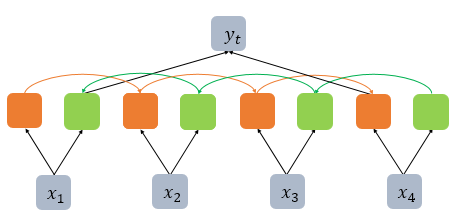

In [24]:
# return_sequences=True인 경우
bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))

hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.5511133  0.5511133  0.5511133  0.58863586 0.58863586 0.58863586]
  [0.59115744 0.59115744 0.59115744 0.3951699  0.3951699  0.3951699 ]
  [0.63031393 0.63031393 0.63031393 0.21942244 0.21942244 0.21942244]]], shape: (1, 4, 6)
forward state : [[0.63031393 0.63031393 0.63031393]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


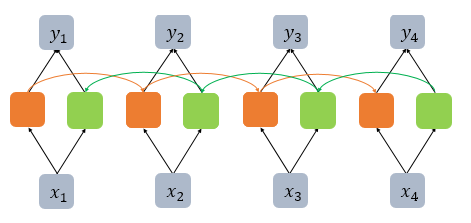

### RNN을 이용한 텍스트 생성 (Text Generating using RNN)
- '경마장에 있는 말이 뛰고 있다', '그의 말이 법이다', '가는 말이 고와야 오는 말이 곱다'
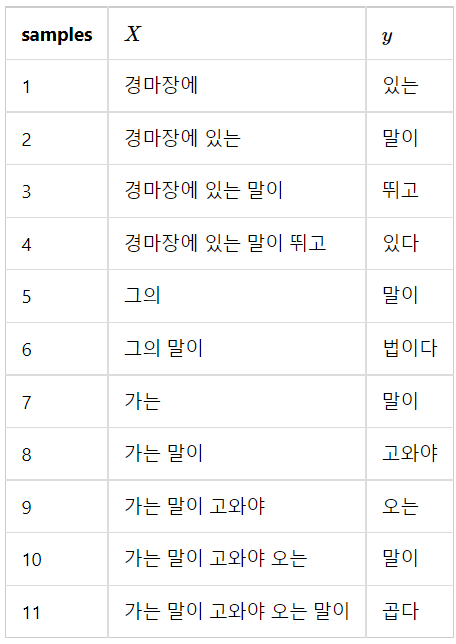

#### 데이터에 대한 이해와 전처리

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
# 3개 예제 문장 저장
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [3]:
# 단어 집합 생성하고 크기 확인
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1 # 케라스 토크나이저 정수 인코딩 1에서 시작하지만 패딩 위한 0 고려하여 +1 해줌
print('단어 집합의 크기: %d' % vocab_size)

단어 집합의 크기: 12


In [4]:
# 각 단어와 단어에 부여된 정수 인덱스 출력
print(tokenizer.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [10]:
# 훈련 데이터 만들기
sequences = list()
for line in text.split('\n'): # 줄바꿈 문자를 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)
        
print('학습에 사용될 샘플의 개수: %d' % len(sequences))

학습에 사용될 샘플의 개수: 11


In [11]:
print(sequences) # 레이블로 사용될 단어를 분리하지 않은 훈련 데이터

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


In [12]:
# 전체 샘플에 대해서 길이 일치시켜 주기
max_len = max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이: {}'.format(max_len))

샘플의 최대 길이: 6


- pad_sequences(): 모든 샘플에 대해서 0을 사용하여 길이를 맞춰줌
    - maxlen의 길이로 맞춰주고
    - padding의 인자로 'pre'주면 maxlen보다 짧은 샘플의 앞에 0으로 채움

In [14]:
# 전체 샘플의 길이를 6으로 패딩
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [15]:
print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


In [16]:
# 마지막 단어 레이블로 분리
sequences = np.array(sequences)
X = sequences[:, :-1]
y = sequences[:, -1]

In [17]:
print(X)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]


In [18]:
print(y)

[ 3  1  4  5  1  7  1  9 10  1 11]


In [19]:
# 레이블에 대해 원-핫 인코딩 수행
y = to_categorical(y, num_classes=vocab_size)

In [20]:
print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


#### 모델 설계하기

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

- 임베딩 벡터의 차원은 10, 은닉상태의 크기는 32
- 다 대 일 구조의 RNN 사용
- Fully connected layer을 출력층으로 단어 집합 크기만큼 뉴런 배치하여 모델 설계
- 마지막 시점에서 모든 가능한 단어 중 하나의 단어를 예측하는 다중 클래스 분류 문제 수행하는 모델임
    - 활성화 함수로 소프트맥스
    - 손실함수로 크로스 엔트로피 함수
- 200 에포크

In [22]:
embedding_dim = 10
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 1s - loss: 2.5092 - accuracy: 0.0000e+00
Epoch 2/200
1/1 - 0s - loss: 2.4960 - accuracy: 0.0000e+00
Epoch 3/200
1/1 - 0s - loss: 2.4832 - accuracy: 0.0000e+00
Epoch 4/200
1/1 - 0s - loss: 2.4707 - accuracy: 0.1818
Epoch 5/200
1/1 - 0s - loss: 2.4583 - accuracy: 0.1818
Epoch 6/200
1/1 - 0s - loss: 2.4458 - accuracy: 0.2727
Epoch 7/200
1/1 - 0s - loss: 2.4331 - accuracy: 0.2727
Epoch 8/200
1/1 - 0s - loss: 2.4201 - accuracy: 0.3636
Epoch 9/200
1/1 - 0s - loss: 2.4067 - accuracy: 0.4545
Epoch 10/200
1/1 - 0s - loss: 2.3927 - accuracy: 0.4545
Epoch 11/200
1/1 - 0s - loss: 2.3780 - accuracy: 0.4545
Epoch 12/200
1/1 - 0s - loss: 2.3626 - accuracy: 0.4545
Epoch 13/200
1/1 - 0s - loss: 2.3463 - accuracy: 0.4545
Epoch 14/200
1/1 - 0s - loss: 2.3290 - accuracy: 0.4545
Epoch 15/200
1/1 - 0s - loss: 2.3108 - accuracy: 0.4545
Epoch 16/200
1/1 - 0s - loss: 2.2914 - accuracy: 0.4545
Epoch 17/200
1/1 - 0s - loss: 2.2710 - accuracy: 0.4545
Epoch 18/200
1/1 - 0s - loss: 2.2493 - accura

In [23]:
# 모델이 정확하게 예측하고 있는지 문장 생성하는 함수
def sentence_generation(model, tokenizer, current_word, n):
    # 인자로 (모델, 토크나이저, 현재 단어, 반복할 횟수)
    init_word = current_word
    sentence = ''
    
    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)
        
        for word, index in tokenizer.word_index.items():
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break
        
        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' ' + word
        
        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word
        
    sentence = init_word + sentence
    return sentence

In [24]:
print(sentence_generation(model, tokenizer, '경마장에', 4))

경마장에 있는 말이 뛰고 있다


In [25]:
print(sentence_generation(model, tokenizer, '그의', 2))

그의 말이 법이다


In [26]:
print(sentence_generation(model, tokenizer, '가는', 5))

가는 말이 고와야 오는 말이 곱다


### LSTM을 이용하여 텍스트 생성
- 보다 많은 데이터 사용

#### 데이터에 대한 이해와 전처리
- 뉴욕타임즈 기사 제목 데이터 사용

In [27]:
import pandas as pd
import numpy as np
from string import punctuation

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [28]:
df = pd.read_csv('ArticlesApril2018.csv')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [29]:
print(len(df.columns))
print(df.columns)

15
Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')


In [32]:
# headline 열 사용할 것임. null값 확인
print(df['headline'].isnull().values.any())

False


In [33]:
# 모든 신문 기사 제목 뽑아서 리스트에 저장
headline = []
headline.extend(list(df.headline.values))
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

In [34]:
print('총 샘플의 개수: {}'.format(len(headline)))

총 샘플의 개수: 1324


In [35]:
# unknown값 가진 샘플 제거
headline = [word for word in headline if word != 'Unknown']
print('노이즈값 제거 후 샘플 개수: {}'.format(len(headline)))

노이즈값 제거 후 샘플 개수: 1214


In [36]:
# 110개 샘플 제거됨
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?']

In [37]:
# 전처리 수행 (구두점 제거와 단어의 소문자화)
def repreprocessing(raw_sentence):
    preprocessed_sentence = raw_sentence.encode('utf-8').decode('ascii', 'ignore')
    # 구두점 제거와 동시에 소문자화
    return ''.join(word for word in preprocessed_sentence if word not in punctuation).lower()

preprocessed_headline = [repreprocessing(x) for x in headline]
preprocessed_headline[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [38]:
# 단어 집합(vocabulary) 만들고 크기 확인
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_headline)
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기: %d' % vocab_size)

단어 집합의 크기: 3494


In [39]:
# 정수 인코딩 진행 + 하나의 문장을 여러 줄로 분해하여 훈련 데이터 구성
sequences = []

for sentence in preprocessed_headline:
    # 각 샘플에 대한 정수 인코딩
    encoded = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)
        
sequences[:11]

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

In [40]:
index_to_word = {}
for key, value in tokenizer.word_index.items():
    index_to_word[value] = key
    
print('빈도수 상위 582번 단어: {}'.format(index_to_word[582]))

빈도수 상위 582번 단어: offer


In [41]:
# 레이블 분리하기 전 전체 샘플의 길이를 동일하게 만드는 패딩 작업 수행

# 가장 긴 샘플의 길이 확인
max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이: {}'.format(max_len))

샘플의 최대 길이: 24


In [42]:
# 24의 길이로 모든 샘플 길이 패딩
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   99  269]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   99  269  371]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   99  269  371 1115]]


In [43]:
# 레이블 데이터 분리
sequences = np.array(sequences)
X = sequences[:, :-1]
y = sequences[:, -1]

In [44]:
# 레이블 데이터에 대해서 원-핫 인코딩
y = to_categorical(y, num_classes=vocab_size)

#### 모델 설계

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

- 임베딩 벡터 차원 10, 은닉 상태 크기 128
- 다 대 일 구조 LSTM
- fully connected layer을 출력층으로 단어 집합 크기만큼 뉴런 배치
- 다중 클래스 분류 문제 해결하는 모델
    - 소프트맥스, 크로스엔트로피 사용
- 200 epoch

In [47]:
embedding_dim = 10
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
244/244 - 10s - loss: 7.6437 - accuracy: 0.0265
Epoch 2/200
244/244 - 9s - loss: 7.1121 - accuracy: 0.0279
Epoch 3/200
244/244 - 9s - loss: 6.9761 - accuracy: 0.0334
Epoch 4/200
244/244 - 9s - loss: 6.8556 - accuracy: 0.0386
Epoch 5/200
244/244 - 9s - loss: 6.7083 - accuracy: 0.0440
Epoch 6/200
244/244 - 9s - loss: 6.5270 - accuracy: 0.0479
Epoch 7/200
244/244 - 8s - loss: 6.3294 - accuracy: 0.0511
Epoch 8/200
244/244 - 8s - loss: 6.1284 - accuracy: 0.0552
Epoch 9/200
244/244 - 9s - loss: 5.9409 - accuracy: 0.0623
Epoch 10/200
244/244 - 8s - loss: 5.7597 - accuracy: 0.0642
Epoch 11/200
244/244 - 8s - loss: 5.5861 - accuracy: 0.0696
Epoch 12/200
244/244 - 8s - loss: 5.4242 - accuracy: 0.0742
Epoch 13/200
244/244 - 8s - loss: 5.2691 - accuracy: 0.0793
Epoch 14/200
244/244 - 8s - loss: 5.1206 - accuracy: 0.0861
Epoch 15/200
244/244 - 8s - loss: 4.9799 - accuracy: 0.0951
Epoch 16/200
244/244 - 8s - loss: 4.8443 - accuracy: 0.1033
Epoch 17/200
244/244 - 8s - loss: 4.7119 - accur

In [48]:
# 문장 생성하는 함수

def sentence_generation(model, tokenizer, current_word, n):
    # 인자로 (모델, 토크나이저, 현재 단어, 반복할 횟수)
    init_word = current_word
    sentence = ''
    
    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')
        
        # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)
        
        for word, index in tokenizer.word_index.items():
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break
        
        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' ' + word
        
        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word
        
    sentence = init_word + sentence
    return sentence

In [49]:
# 임의의 단어 'i'에 대해서 10개의 단어 추가 생성
print(sentence_generation(model, tokenizer, 'i', 10))

i cant jump ship from facebook yet them has out at


In [50]:
# 임의의 단어 'how'에 대해서 10개의 단어 추가 생성
print(sentence_generation(model, tokenizer, 'how', 10))

how to make a crossword puzzle senate or a purple and


### 문자 단위 RNN 언어 모델 (Char RNNLM)
- 이전 시점의 예측 문자를 다음 시점의 입력으로 사용하는 Char RNNLM
- 단어 단위가 아닌 문자 단위로 입,출력으로 사용하기 때문에 임베딩층은 사용하지 않음

#### 데이터에 대한 이해와 전처리
- http://www.gutenberg.org/files/11/11-0.txt
- '이상한 나라의 앨리스'

In [51]:
import numpy as np
import urllib.request
from tensorflow.keras.utils import to_categorical

# 데이터 로드
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename='11-0.txt')

f = open('11-0.txt', 'rb')

# 전처리
sentences = []
for sentence in f: # 데이터로부터 한 줄씩 읽음
    sentence = sentence.strip() # \r, \n 제거
    sentence = sentence.lower() # 소문자화
    sentence = sentence.decode('ascii', 'ignore') # \xe2\x80\x99 등과 같은 바이트 열 제거
    if len(sentence) > 0:
        sentences.append(sentence)
f.close()

In [52]:
sentences[:5]

['the project gutenberg ebook of alices adventures in wonderland, by lewis carroll',
 'this ebook is for the use of anyone anywhere in the united states and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever. you may copy it, give it away or re-use it under the terms',
 'of the project gutenberg license included with this ebook or online at']

In [53]:
# 하나의 문자열로 통합
total_data = ' '.join(sentences)
print('문자열의 길이 또는 총 문자의 개수: %d' % len(total_data))

문자열의 길이 또는 총 문자의 개수: 159484


In [54]:
print(total_data[:200])

the project gutenberg ebook of alices adventures in wonderland, by lewis carroll this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with


In [55]:
# total_data 문자열로부터 문자 집합 만들기 (단어 집합 X 문자 집합 O)
char_vocab = sorted(list(set(total_data)))
vocab_size = len(char_vocab)
print('문자 집합의 크기: {}'.format(vocab_size))

문자 집합의 크기: 56


영어가 훈련 데이터일 때 문자 집합의 크기가 단어 집합의 크기보다 현저히 작은 이유
- 아무리 단어가 많아도 사용되는 문자는 26개의 알파벳 뿐이기 때문
- 대소문자가 구분되어 있어도 52개

In [56]:
# 문자에 고유한 정수 부여
char_to_index = dict((char, index) for index, char in enumerate(char_vocab))
print('문자 집합: ', char_to_index)

문자 집합:  {' ': 0, '!': 1, '"': 2, '#': 3, '$': 4, '%': 5, "'": 6, '(': 7, ')': 8, '*': 9, ',': 10, '-': 11, '.': 12, '/': 13, '0': 14, '1': 15, '2': 16, '3': 17, '4': 18, '5': 19, '6': 20, '7': 21, '8': 22, '9': 23, ':': 24, ';': 25, '?': 26, '[': 27, ']': 28, '_': 29, 'a': 30, 'b': 31, 'c': 32, 'd': 33, 'e': 34, 'f': 35, 'g': 36, 'h': 37, 'i': 38, 'j': 39, 'k': 40, 'l': 41, 'm': 42, 'n': 43, 'o': 44, 'p': 45, 'q': 46, 'r': 47, 's': 48, 't': 49, 'u': 50, 'v': 51, 'w': 52, 'x': 53, 'y': 54, 'z': 55}


0-28: 공백 포함한 각종 구두점, 특수문자  
29-54: a-z 26개의 알파벳 소문자

In [57]:
# 정수로부터 문자 리턴하는 index_to_char
index_to_char = {}
for key, value in char_to_index.items():
    index_to_char[value] = key

In [58]:
# 샘플 만들기
# 문장 샘플의 길이 정하고 -> 해당 길이만큼 문자열 전체 등분
seq_length = 60

# 문자열의 길이를 seq_length로 나누면 전처리 후 생겨날 샘플 수
n_samples = int(np.floor((len(total_data) - 1) / seq_length))
print('샘플의 수: {}'.format(n_samples))

샘플의 수: 2658


In [59]:
# 전처리
train_X = []
train_y = []

for i in range(n_samples):
    # 0:60 -> 60:120 -> 120:180로 loop 돌면서 문장 샘플 하나씩 pick
    X_sample = total_data[i * seq_length: (i+1) * seq_length]
    
    # 정수 인코딩
    X_encoded = [char_to_index[c] for c in X_sample]
    train_X.append(X_encoded)
    
    # 오른쪽으로 1칸 쉬프트
    y_sample = total_data[i * seq_length + 1: (i + 1) * seq_length + 1]
    y_encoded = [char_to_index[c] for c in y_sample]
    train_y.append(y_encoded)

In [60]:
# train_X와 train_y의 첫번째 샘플 출력
print('X 데이터의 첫번째 샘플 :',train_X[0])
print('y 데이터의 첫번째 샘플 :',train_y[0])
print('-'*50)
print('X 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_X[0]])
print('y 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_y[0]])

X 데이터의 첫번째 샘플 : [49, 37, 34, 0, 45, 47, 44, 39, 34, 32, 49, 0, 36, 50, 49, 34, 43, 31, 34, 47, 36, 0, 34, 31, 44, 44, 40, 0, 44, 35, 0, 30, 41, 38, 32, 34, 48, 0, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 0, 38, 43, 0, 52, 44, 43, 33, 34, 47, 41, 30]
y 데이터의 첫번째 샘플 : [37, 34, 0, 45, 47, 44, 39, 34, 32, 49, 0, 36, 50, 49, 34, 43, 31, 34, 47, 36, 0, 34, 31, 44, 44, 40, 0, 44, 35, 0, 30, 41, 38, 32, 34, 48, 0, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 0, 38, 43, 0, 52, 44, 43, 33, 34, 47, 41, 30, 43]
--------------------------------------------------
X 데이터의 첫번째 샘플 디코딩 : ['t', 'h', 'e', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e', 'b', 'o', 'o', 'k', ' ', 'o', 'f', ' ', 'a', 'l', 'i', 'c', 'e', 's', ' ', 'a', 'd', 'v', 'e', 'n', 't', 'u', 'r', 'e', 's', ' ', 'i', 'n', ' ', 'w', 'o', 'n', 'd', 'e', 'r', 'l', 'a']
y 데이터의 첫번째 샘플 디코딩 : ['h', 'e', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e',

train_y[0]은 train_X[0]에서 오른쪽으로 한 칸 쉬프트 된 문장임을 알 수 있음

In [61]:
# train_X와 train_y에 대해서 원-핫 인코딩 수행
# 임베딩층을 사용하지 않으므로 입력 시퀀스인 train_X에 대해서도 원-핫 인코딩 함
train_X = to_categorical(train_X)
train_y = to_categorical(train_y)

print('train_X의 크기(shape) : {}'.format(train_X.shape)) # 원-핫 인코딩
print('train_y의 크기(shape) : {}'.format(train_y.shape)) # 원-핫 인코딩

train_X의 크기(shape) : (2658, 60, 56)
train_y의 크기(shape) : (2658, 60, 56)


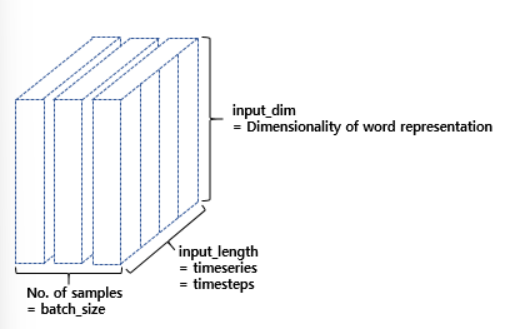

- no. of samples 2,658개
- input_length(입력 시퀀스의 길이): 60
- input_dim (각 벡터의 차원): 55

- 원-핫 벡터의 차원은 문자 집합의 크기인 56이어야 하므로 원-핫 인코딩이 수행되었음을 알 수 있음

#### 모델 설계
- 은닉상태 크기 256
- 다 대 다 구조의 LSTM 사용, LSTM 2개 사용
- fully connected layer을 출력층으로 문자 집합 크기만큼 뉴런 배치하여 모델 설계
- 다중 클래스 분류 문제 (모든 시점에서 모든 가능한 문자 중 하나의 문자 예측)
    - 소프트맥스, 크로스 엔트로피
- 80 epoch

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed

hidden_units = 256

model = Sequential()
model.add(LSTM(hidden_units, input_shape=(None, train_X.shape[2]), return_sequences=True))
model.add(LSTM(hidden_units, return_sequences=True))
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=80, verbose=2)

Epoch 1/80
84/84 - 18s - loss: 3.0792 - accuracy: 0.1804
Epoch 2/80
84/84 - 16s - loss: 2.7146 - accuracy: 0.2480
Epoch 3/80
84/84 - 16s - loss: 2.3659 - accuracy: 0.3336
Epoch 4/80
84/84 - 16s - loss: 2.2192 - accuracy: 0.3690
Epoch 5/80
84/84 - 16s - loss: 2.1140 - accuracy: 0.3968
Epoch 6/80
84/84 - 16s - loss: 2.0402 - accuracy: 0.4129
Epoch 7/80
84/84 - 16s - loss: 1.9598 - accuracy: 0.4337
Epoch 8/80
84/84 - 17s - loss: 1.8958 - accuracy: 0.4509
Epoch 9/80
84/84 - 17s - loss: 1.8378 - accuracy: 0.4678
Epoch 10/80
84/84 - 17s - loss: 1.7861 - accuracy: 0.4815
Epoch 11/80
84/84 - 17s - loss: 1.7413 - accuracy: 0.4930
Epoch 12/80
84/84 - 17s - loss: 1.6933 - accuracy: 0.5059
Epoch 13/80
84/84 - 17s - loss: 1.6523 - accuracy: 0.5154
Epoch 14/80
84/84 - 17s - loss: 1.6130 - accuracy: 0.5255
Epoch 15/80
84/84 - 17s - loss: 1.5744 - accuracy: 0.5356
Epoch 16/80
84/84 - 17s - loss: 1.5369 - accuracy: 0.5458
Epoch 17/80
84/84 - 17s - loss: 1.5050 - accuracy: 0.5538
Epoch 18/80
84/84 - 17s

In [64]:
# 특정 문자를 주면 다음 문자를 계속해서 생성해내는 함수
# 인자 (학습한 모델, 그리고 모델로 다음 문자 몇 번 생성할 것인지 횟수)

def sentence_generation(model, length):
    # 문자에 대한 랜덤한 정수 생성
    ix = [np.random.randint(vocab_size)]
    
    # 랜덤한 정수로부터 맵핑되는 문자 생성
    y_char = [index_to_char[ix[-1]]]
    print(ix[-1], '번 문자', y_char[-1], '로 예측을 시작!')
    
    # (1, length, 55) 크기의 x 생성. 즉, LSTM의 입력 시퀀스 생성
    X = np.zeros((1, length, vocab_size))
    
    for i in range(length):
        # X[0][i][예측한 문자의 인덱스] = 1, 즉, 예측 문자를 다음 입력 시퀀스에 추가
        X[0][i][ix[-1]] = 1
        print(index_to_char[ix[-1]], end='')
        ix = np.argmax(model.predict(X[:, :i+1, :])[0], 1)
        y_char.append(index_to_char[ix[-1]])
    return ('').join(y_char)

In [65]:
result = sentence_generation(model, 100)
print(result)

0 번 문자   로 예측을 시작!
 the other two were using it as a cushion, resting theig the sautes. i only wish i wasnt quite all s the other two were using it as a cushion, resting theig the sautes. i only wish i wasnt quite all st


### 문자 단위 RNN(Char RNN)으로 텍스트 생성하기

#### 데이터에 대한 이해와 전처리

In [66]:
import numpy as np
from tensorflow.keras.utils import to_categorical

In [67]:
# 노래 가사
raw_text = '''
I get on with life as a programmer,
I like to contemplate beer.
But when I start to daydream,
My mind turns straight to wine.

Do I love wine more than beer?

I like to use words about beer.
But when I stop my talking,
My mind turns straight to wine.

I hate bugs and errors.
But I just think back to wine,
And I'm happy once again.

I like to hang out with programming and deep learning.
But when left alone,
My mind turns straight to wine.
'''

In [68]:
# 단락 구분 없애고 하나의 문자열로 재저장
tokens = raw_text.split()
raw_text = ' '.join(tokens)
print(raw_text)

I get on with life as a programmer, I like to contemplate beer. But when I start to daydream, My mind turns straight to wine. Do I love wine more than beer? I like to use words about beer. But when I stop my talking, My mind turns straight to wine. I hate bugs and errors. But I just think back to wine, And I'm happy once again. I like to hang out with programming and deep learning. But when left alone, My mind turns straight to wine.


In [69]:
# 중복을 제거한 문자 집합 생성
char_vocab = sorted(list(set(raw_text)))
vocab_size = len(char_vocab)
print('문자 집합: ', char_vocab)
print('문자 집합의 크기: {}'.format(vocab_size))

문자 집합:  [' ', "'", ',', '.', '?', 'A', 'B', 'D', 'I', 'M', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y']
문자 집합의 크기: 33


In [70]:
char_to_index = dict((char, index) for index, char in enumerate(char_vocab))
print(char_to_index)

{' ': 0, "'": 1, ',': 2, '.': 3, '?': 4, 'A': 5, 'B': 6, 'D': 7, 'I': 8, 'M': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'r': 26, 's': 27, 't': 28, 'u': 29, 'v': 30, 'w': 31, 'y': 32}


In [71]:
# 입력 시퀀스의 길이가 10이 되도록 데이터 구성 (예측 대상인 문자도 필요하므로 길이가 11이 되도록)
length = 11
sequences = []
for i in range(length, len(raw_text)):
    seq = raw_text[i-length:i] # 길이 11의 문자열을 지속적으로 만듦
    sequences.append(seq)
print('총 훈련 샘플의 수: %d' % len(sequences))

총 훈련 샘플의 수: 426


In [72]:
# 총 샘플 중 10개만 출력
sequences[:10]

['I get on wi',
 ' get on wit',
 'get on with',
 'et on with ',
 't on with l',
 ' on with li',
 'on with lif',
 'n with life',
 ' with life ',
 'with life a']

In [73]:
# 정수 인코딩
encoded_sequences = []
for sequence in sequences:
    encoded_sequence = [char_to_index[char] for char in sequence]
    encoded_sequences.append(encoded_sequence)
    
encoded_sequences[:5]

[[8, 0, 16, 14, 28, 0, 24, 23, 0, 31, 18],
 [0, 16, 14, 28, 0, 24, 23, 0, 31, 18, 28],
 [16, 14, 28, 0, 24, 23, 0, 31, 18, 28, 17],
 [14, 28, 0, 24, 23, 0, 31, 18, 28, 17, 0],
 [28, 0, 24, 23, 0, 31, 18, 28, 17, 0, 21]]

In [74]:
# 예측 대상 문자 분리
encoded_sequences = np.array(encoded_sequences)

X_data = encoded_sequences[:, :-1]
y_data = encoded_sequences[:, -1]

In [75]:
# 원-핫 인코딩
X_data_one_hot = [to_categorical(encoded, num_classes=vocab_size) for encoded in X_data]
X_data_one_hot = np.array(X_data_one_hot)
y_data_one_hot = to_categorical(y_data, num_classes=vocab_size)

In [76]:
# 원-핫 인코딩 수행 후 X의 크기 확인
print(X_data_one_hot.shape)

(426, 10, 33)


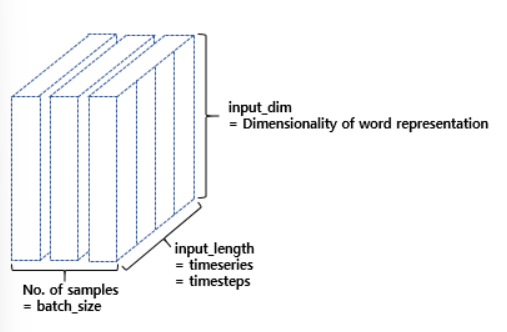

- 샘플 수 426개, 입력 시퀀스 길이 10, 각 벡터의 차원 33

#### 모델 설계
- 은닉상태의 크기 64
- 다 대 일 구조의 LSTM
- fully connected layer을 출력층으로 문자 집합 크기만큼 뉴런 배치하여 모델 설계
- 다중 클래스 분류 (소프트맥스, 크로스엔트로피)
- 100 epoch

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

hidden_units = 64

model = Sequential()
model.add(LSTM(hidden_units, input_shape=(X_data_one_hot.shape[1], X_data_one_hot.shape[2])))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_data_one_hot, y_data_one_hot, epochs=100, verbose=2)

Epoch 1/100
14/14 - 1s - loss: 3.4658 - accuracy: 0.1291
Epoch 2/100
14/14 - 0s - loss: 3.3474 - accuracy: 0.1972
Epoch 3/100
14/14 - 0s - loss: 3.0949 - accuracy: 0.1972
Epoch 4/100
14/14 - 0s - loss: 2.9887 - accuracy: 0.1972
Epoch 5/100
14/14 - 0s - loss: 2.9522 - accuracy: 0.1972
Epoch 6/100
14/14 - 0s - loss: 2.9235 - accuracy: 0.1972
Epoch 7/100
14/14 - 0s - loss: 2.8983 - accuracy: 0.1972
Epoch 8/100
14/14 - 0s - loss: 2.8714 - accuracy: 0.1972
Epoch 9/100
14/14 - 0s - loss: 2.8306 - accuracy: 0.1972
Epoch 10/100
14/14 - 0s - loss: 2.7863 - accuracy: 0.1972
Epoch 11/100
14/14 - 0s - loss: 2.7455 - accuracy: 0.1995
Epoch 12/100
14/14 - 0s - loss: 2.6934 - accuracy: 0.2160
Epoch 13/100
14/14 - 0s - loss: 2.6611 - accuracy: 0.2207
Epoch 14/100
14/14 - 0s - loss: 2.6212 - accuracy: 0.2230
Epoch 15/100
14/14 - 0s - loss: 2.5713 - accuracy: 0.2582
Epoch 16/100
14/14 - 0s - loss: 2.5342 - accuracy: 0.2465
Epoch 17/100
14/14 - 0s - loss: 2.4851 - accuracy: 0.2793
Epoch 18/100
14/14 - 0s

In [78]:
def sentence_generation(model, char_to_index, seq_length, seed_text, n):

    # 초기 시퀀스
    init_text = seed_text
    sentence = ''

    # 다음 문자 예측은 총 n번만 반복.
    for _ in range(n):
        encoded = [char_to_index[char] for char in seed_text] # 현재 시퀀스에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=seq_length, padding='pre') # 데이터에 대한 패딩
        encoded = to_categorical(encoded, num_classes=len(char_to_index))

        # 입력한 X(현재 시퀀스)에 대해서 y를 예측하고 y(예측한 문자)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for char, index in char_to_index.items():
            if index == result:
                break

        # 현재 시퀀스 + 예측 문자를 현재 시퀀스로 변경
        seed_text = seed_text + char

        # 예측 문자를 문장에 저장
        sentence = sentence + char

    # n번의 다음 문자 예측이 끝나면 최종 완성된 문장을 리턴.
    sentence = init_text + sentence
    return sentence

In [79]:
print(sentence_generation(model, char_to_index, 10, 'I get on w', 80))

I get on with life as a programmer, I like to cse woya teaop mnnn earr ttost midambbe s . 


출력된 2개의 문장은 훈련 데이터에서는 연속적으로 나온 적이 없는 두 문장임에도 모델이 임의로 생성해냄